# Movie Rating Prediction
### Building a model that predicts the rating of movie based on features like genre, director and actors

In [5]:
from google.colab import files

uploaded = files.upload()



Saving Movies.csv to Movies.csv


In [2]:
import pandas as pd
import chardet


In [6]:
with open('Movies.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [7]:
df = pd.read_csv('Movies.csv',sep=",",engine='python', encoding=encoding)

In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Data Preprocessing

In [10]:
# Check for missing values
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
# Display rows with missing values
nulls = df[df.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# checking for unique values in column

for col_name, col_values in df.items():
    if col_values.dtype == 'O':
        print(f"Name of Column: {col_name}")
        print(col_values.unique())
        print('\n', '-' * (len(col_name) + 15), '\n')


Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------- 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2

In [13]:
# Handling null values
df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)


In [14]:
# Replacing the brackets from year column as observed above
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

# Convert 'Duration' to numeric and replacing the min, while keeping only numerical part
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [15]:
#Extracting only the text part from the Name column
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [16]:
# Splitting the genre by , to keep only unique genres and replacing the null values with mode
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [17]:
# Convert 'Votes' to numeric and replace the , to keep only numerical part
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [18]:
# Dropping the duplicated values by Name
df = df.drop_duplicates(subset=['Name'], keep=False)

## Descriptive Analysis

In [19]:
df.describe()

,Year,Duration,Rating,Votes
count,1528.000000,1528.000000,1528.000000,1528.000000
mean,1997.972513,123.823953,5.976243,552.479712
std,21.181921,25.108144,1.412547,4311.631841
min,1931.000000,45.000000,1.600000,5.000000
25%,1985.000000,107.000000,5.100000,14.000000
50%,2004.000000,126.000000,6.100000,34.000000
75%,2016.000000,140.000000,7.000000,127.250000
max,2021.000000,300.000000,9.400000,101014.000000


In [20]:
df.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,1528,1528,1528,1528,1528,1528
unique,1528,20,1114,1010,1131,1154
top,Gadhvi,Drama,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,789,13,22,12,16


In [21]:
# Task 1: Year with the best rating

best_rating_year = df.loc[df['Rating'].idxmax()]['Year']
print(f"Year with the best rating: {best_rating_year}")

Year with the best rating: 2021


In [22]:
# Task 2: Does the length of the movie have any impact on the rating?

correlation = df['Duration'].corr(df['Rating'])
print(f"Correlation between Duration and Rating: {correlation}")

Correlation between Duration and Rating: -0.0637936782589745


In [23]:
# Task 3: Top 10 movies according to rating per year and overall

# Top 10 movies per year
top_movies_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating'))
print("Top 10 movies per year:\n", top_movies_per_year.to_markdown())

# Top 10 movies overall
top_movies_overall = df.nlargest(10, 'Rating')
print("\nTop 10 movies overall:\n", top_movies_overall.to_markdown())


Top 10 movies per year:
 |               | Name                                   |   Year |   Duration | Genre       |   Rating |   Votes | Director                   | Actor 1                    | Actor 2                    | Actor 3                |
|:--------------|:---------------------------------------|-------:|-----------:|:------------|---------:|--------:|:---------------------------|:---------------------------|:---------------------------|:-----------------------|
| (1931, 4171)  | Draupadi                               |   1931 |        124 | Drama       |      5.3 |       6 | Bhagwati Prasad Mishra     | Khalil                     | Ermeline                   | Jillo                  |
| (1932, 9035)  | Maya Machhindra                        |   1932 |        154 | Drama       |      5.8 |      13 | Shantaram Rajaram Vankudre | Govindrao Tembe            | Durga Khote                | Master Vinayak         |
| (1933, 11138) | Puran Bhagat                           |   19

In [24]:
# Task 4: Number of popular movies released each year
popular_movies_threshold = 8.0  # Define your threshold for what's considered popular
popular_movies_per_year = df[df['Rating'] >= popular_movies_threshold].groupby('Year').size()
print("Number of popular movies released each year:\n", popular_movies_per_year.to_markdown())


Number of popular movies released each year:
 |   Year |   0 |
|-------:|----:|
|   1953 |   1 |
|   1955 |   1 |
|   1959 |   2 |
|   1969 |   1 |
|   1970 |   2 |
|   1972 |   1 |
|   1974 |   2 |
|   1975 |   1 |
|   1980 |   1 |
|   1983 |   1 |
|   1984 |   2 |
|   1985 |   1 |
|   1988 |   1 |
|   2001 |   1 |
|   2003 |   2 |
|   2004 |   1 |
|   2005 |   2 |
|   2007 |   2 |
|   2008 |   2 |
|   2010 |   1 |
|   2011 |   1 |
|   2012 |   2 |
|   2014 |   2 |
|   2015 |   5 |
|   2016 |   5 |
|   2017 |  11 |
|   2018 |  11 |
|   2019 |  11 |
|   2020 |  10 |
|   2021 |  10 |


In [25]:
# Task 5: Counting the number of votes, which movies performed better in rating per year and overall
max_rating_per_year = df.groupby('Year')['Rating'].transform(max)
best_movies_per_year = df[df['Rating'] == max_rating_per_year]
print("Best movies per year based on rating:\n", best_movies_per_year.to_markdown())
print('---------------------------------------------------------------------------')
# Task 6: Which director directed the most movies
most_directed_director = df['Director'].value_counts().idxmax()
print(f"Director who directed the most movies: {most_directed_director}")
print('---------------------------------------------------------------------------')
# Task 7: Which actor starred in the most movies
actor_counts = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).value_counts()
most_starred_actor = actor_counts.idxmax()
print(f"Actor who starred in the most movies: {most_starred_actor}")

Best movies per year based on rating:
 |       | Name                             |   Year |   Duration | Genre       |   Rating |   Votes | Director                   | Actor 1                  | Actor 2              | Actor 3              |
|------:|:---------------------------------|-------:|-----------:|:------------|---------:|--------:|:---------------------------|:-------------------------|:---------------------|:---------------------|
|   218 | Aadmi Ki Aurat Aur Anya Kahaniya |   2009 |         78 | Drama       |      7.6 |      62 | Amit Dutta                 | Ashok Chaudhary          | Bramhaswaroop Mishra | Gagan Singh Sethi    |
|   351 | Aakhri Khat                      |   1966 |        153 | Drama       |      6.9 |     122 | Chetan Anand               | Rajesh Khanna            | Indrani Mukherjee    | Master Bunty         |
|   487 | Aashirwad                        |   1968 |        146 | Drama       |      7.3 |     203 | Hrishikesh Mukherjee       | Ashok Kumar   

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

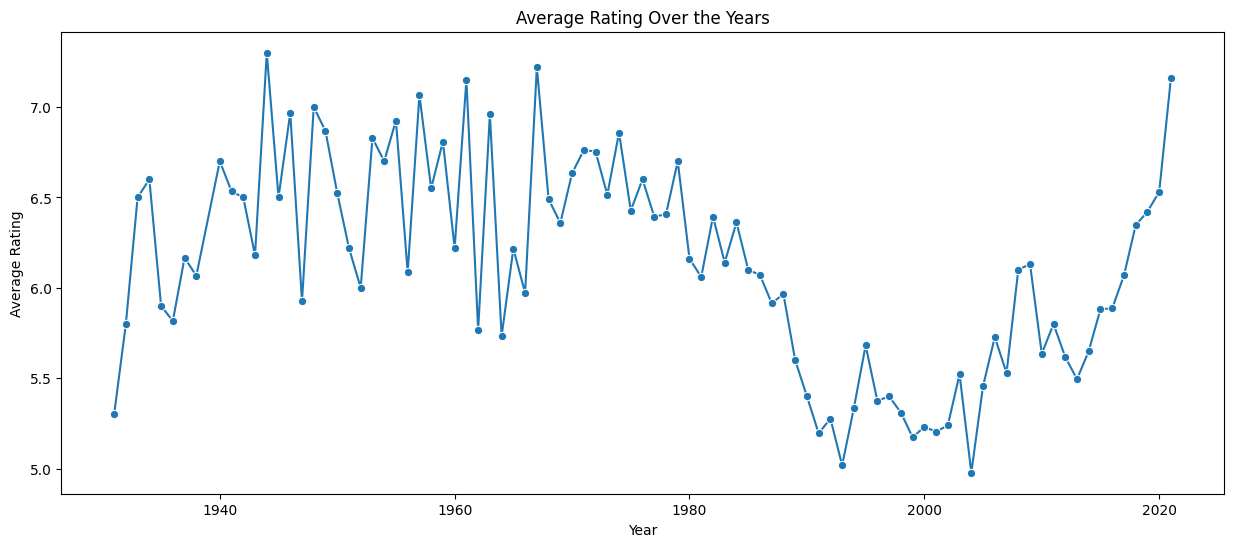

In [27]:

# Task 1: Year with the best rating
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='Rating', data=df.groupby('Year')['Rating'].mean().reset_index(), marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


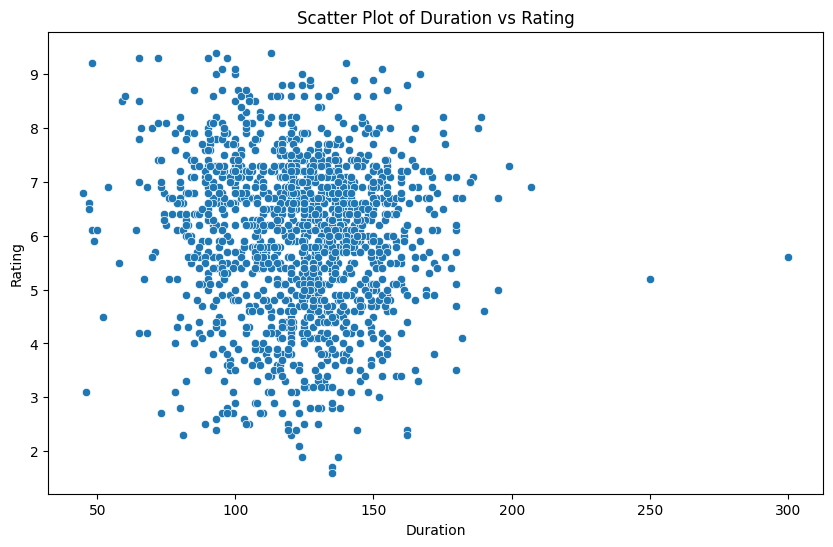

In [28]:

# Task 2: Does the length of the movie have any impact on the rating?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Scatter Plot of Duration vs Rating')
plt.show()

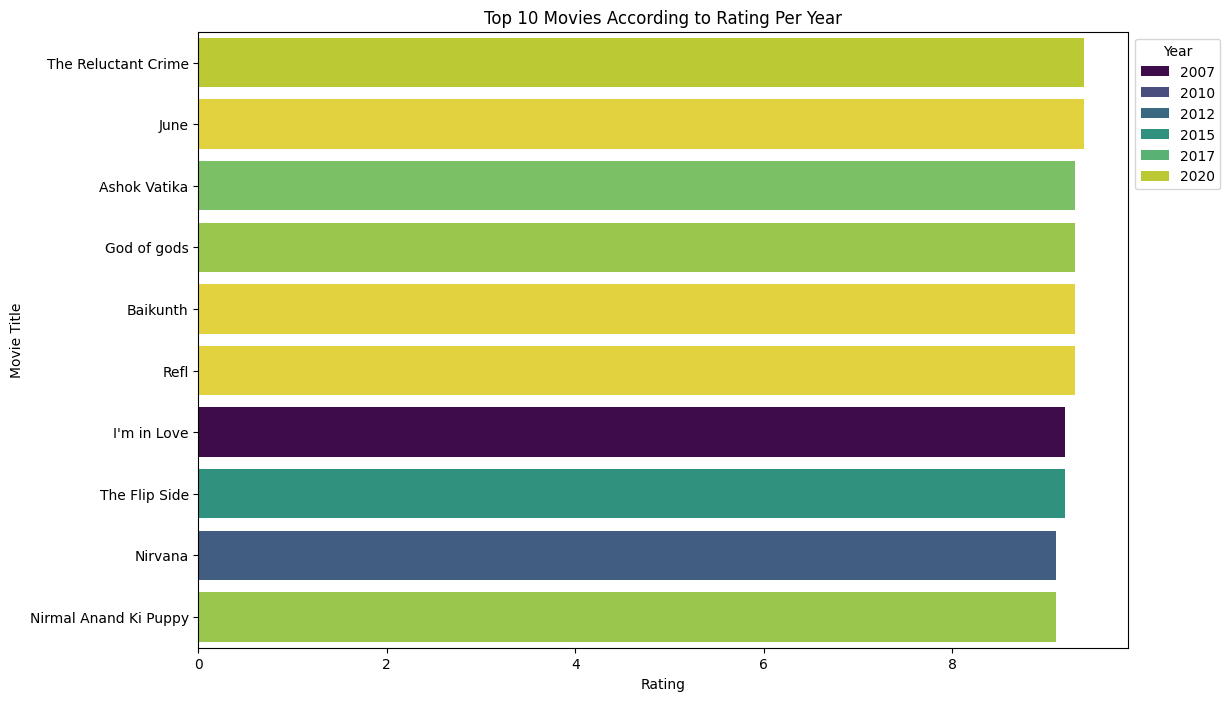

In [29]:

# Task 3: Top 10 movies according to rating per year and overall
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Name', hue='Year', data=df.groupby(['Year', 'Name']).max('Rating').reset_index().nlargest(10, 'Rating'), palette='viridis')
plt.title('Top 10 Movies According to Rating Per Year')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()

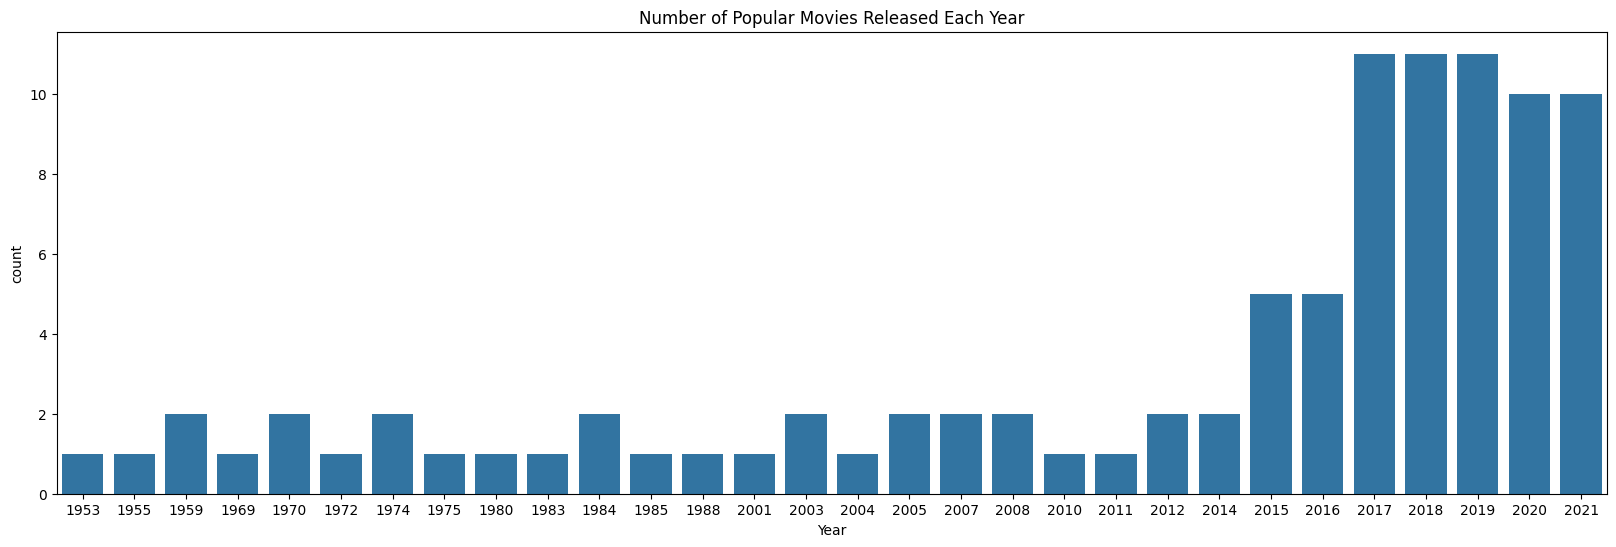

In [30]:
# Task 4: Number of popular movies released each year
plt.figure(figsize=(20, 6))
sns.countplot(x='Year', data=df[df['Rating'] >= popular_movies_threshold])
plt.title('Number of Popular Movies Released Each Year')
plt.show()

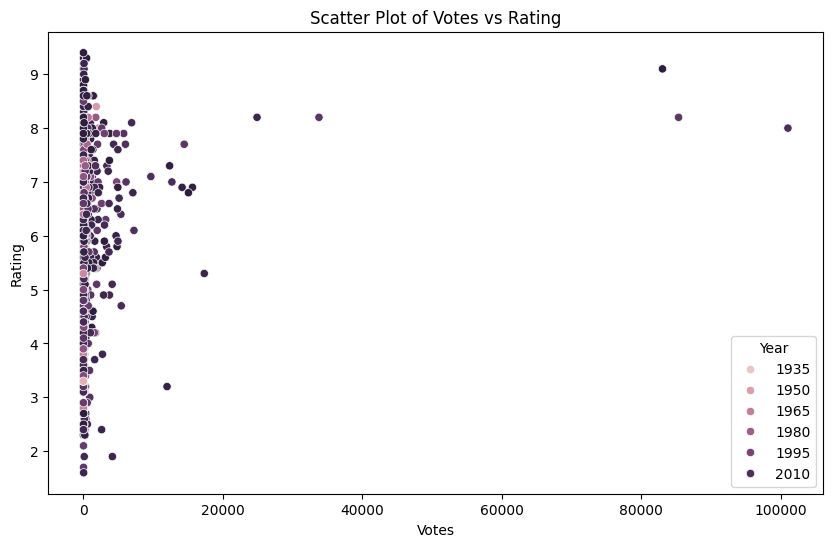

In [31]:
# Task 5: Counting the number of votes, which movies performed better in rating per year and overall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', hue='Year', data=df)
plt.title('Scatter Plot of Votes vs Rating')
plt.show()

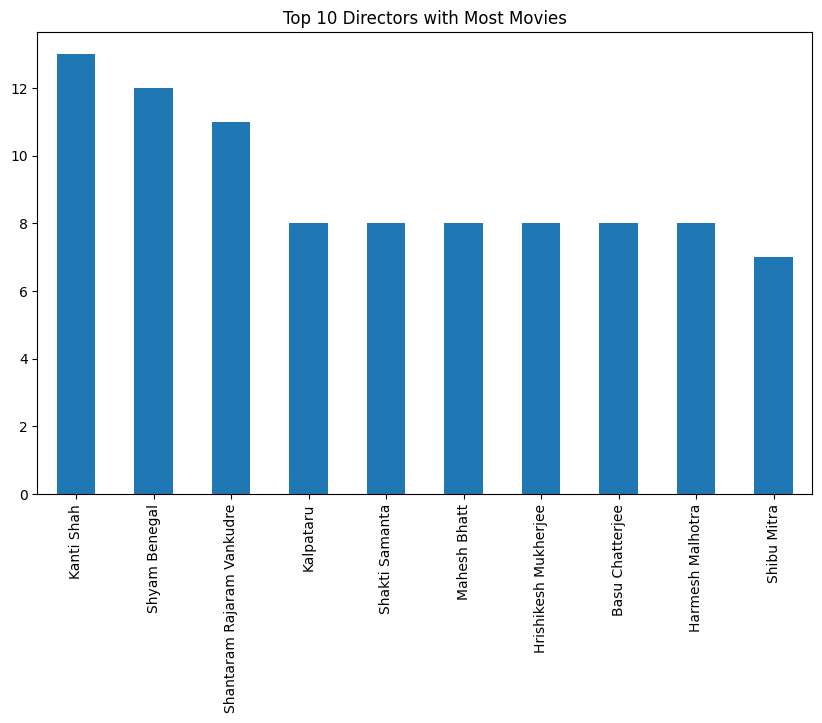

In [32]:
# Task 6: Which director directed the most movies
plt.figure(figsize=(10, 6))
df['Director'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Directors with Most Movies')
plt.show()

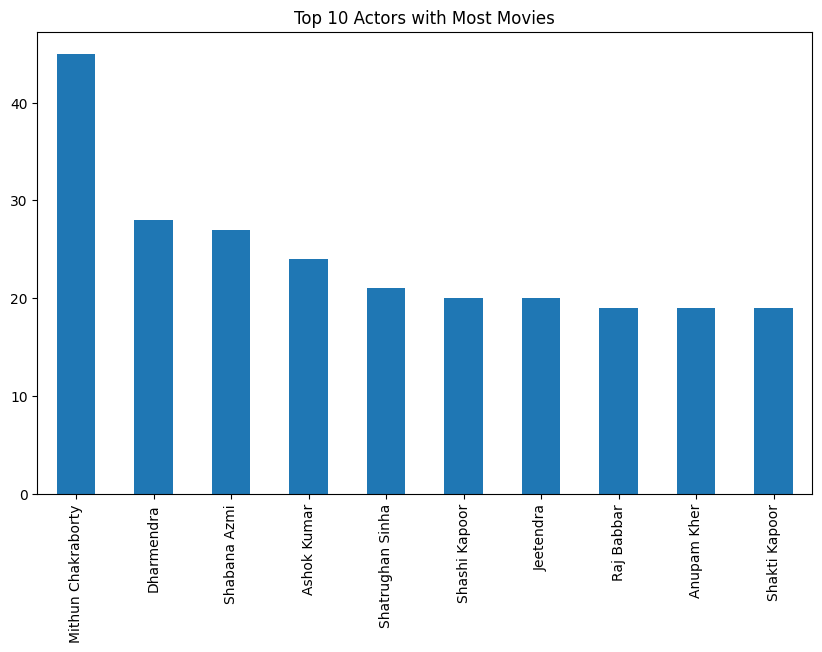

In [33]:
# Task 7: Which actor starred in the most movies
plt.figure(figsize=(10, 6))
actor_counts.nlargest(10).plot(kind='bar')
plt.title('Top 10 Actors with Most Movies')
plt.show()

### feature engineering

In [35]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
30,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor


In [ ]:
# Dropping non-essential columns
df.drop('Name', axis=1, inplace=True)



In [38]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [42]:
# Keeping the predictor and target variable
X = df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']




In [43]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score


In [44]:
# Splitting the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Building and training machine learning models
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [46]:
# Evaluating the performance of trained models
print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, lr_pred))
print('R2 score: ', r2_score(y_test, lr_pred))
print('\n', '=' * 100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, rf_pred))
print('R2 score: ', r2_score(y_test, rf_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.13007622782536266
Mean absolute error:  0.25079940977248283
R2 score:  0.935188545523222


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.11512849019607826
Mean absolute error:  0.19137908496732034
R2 score:  0.942636367720156





#### ***Mean Squared Error (MSE):***
* MSE measures the average squared difference between the predicted values and the actual values.


#### ***Mean Absolute Error (MAE):***

*  MAE measures the average absolute difference between the predicted values and the actual values.


#### ***R-squared(R2) Score:***
*   R2 score represents the proportion of the variance in the dependent variable (ratings) that is predictable from the independent variables (features).



####  **For Logistic Regression:**
* MSE = 0.1301. A lower MSE indicates better performance. In this case, the model's predictions, on average, deviate by the squared value of 0.1301 from the actual ratings.
*  MAE = 0.2508. A lower MAE indicates better performance. In this case, the model's predictions, on average, deviate by 0.2508 from the actual ratings.
* R-squared (R2) Score:
R2 = 0.9352. R2 score ranges from 0 to 1, with 1 indicating a perfect fit. Here, 0.9352 suggests that 93.52% of the variance in ratings is explained by the model. This is a high value and indicates a strong model.

#### **For Random Forest Regressor:**

* MSE = 0.1151. A lower MSE indicates better performance. In this case, the Random Forest model's predictions, on average, deviate by the squared value of 0.1151 from the actual ratings.
Mean Absolute Error (MAE):

* MAE = 0.1914. A lower MAE indicates better performance. In this case, the Random Forest model's predictions, on average, deviate by 0.1914 from the actual ratings.
* R2 = 0.9426. R2 score ranges from 0 to 1, with 1 indicating a perfect fit. Here, 0.9426 suggests that 94.26% of the variance in ratings is explained by the Random Forest model. This is also a high value and indicates a strong model.

***In summary, these metrics provide a comprehensive view of how well your models are performing. Lower MSE and MAE values and higher R2 scores generally indicate better predictive performance. The Random Forest Regressor, in this case, appears to outperform the Logistic Regression model based on these metrics.***

## **Model Testing**

In [47]:
# Checking a sample of predictor values on which the model is trained
X.head()



,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.420152,7.000,6.850000,7.000000,7.000
10,2004,17,96,6.420152,6.200,5.766667,5.100000,6.200
11,2016,59,120,4.698529,5.900,5.900000,5.900000,5.900
30,2005,1002,116,6.420152,6.525,6.900000,6.866667,5.700
32,1993,15,168,6.420152,5.400,5.600000,6.400000,5.825


In [48]:
# Checking the rating according to above predictor variables
y.head()

1     7.0
10    6.2
11    5.9
30    7.1
32    5.6
Name: Rating, dtype: float64

In [50]:
# Creating a new dataframe with values close to the 3rd row according to the sample above
data = {'Year': [2019], 'Votes': [8], 'Duration': [109], 'Genre_mean_rating': [6.42], 'Director_encoded': [7.00],
        'Actor1_encoded': [6.85], 'Actor2_encoded': [7.00], 'Actor3_encoded': [7.00]}
dfs = pd.DataFrame(data)

# Predict the movie rating using Random Forest Regressor
predicted_rating = rf.predict(dfs)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 6.9590000000000005


***I extracted data from the initial dataset using X.head() and generated a new dataframe resembling the first row. The initial rating was 7.0. Our trained random forest regressor forecasted 6.95 for unseen data, underscoring the model's robustness.***